In [1]:
from underlying import Underlying
from option import Option
from trader import Trader

import matplotlib.pyplot as plt
from tqdm import tqdm

import numpy as np
import pandas as pd

In [2]:
def payoff_call(X, K):
    return np.maximum(X.iloc[:,-1]- K, 0)
def payoff_put(X, K):
    if len(X.shape) == 1:
        X.shape += (1,)
    return np.maximum(K - X.iloc[:,-1], 0)

In [3]:
#call

In [4]:
mu = 0.06
sigma =  0.1
r = 0.05
T = 1
K = 80
X0 = 80
repeat = 1000

In [5]:
underlying = Underlying(mu, sigma, r, 250)

In [6]:
_, reality = underlying.simulate_P(repeat, T)

In [7]:
vanilla_call = Option(underlying, lambda X: payoff_call(X, K), T)

In [8]:
BC_price_call = vanilla_call.get_MC_price(X0, 0, method = 'var_control')
BC_price_call

5.429360249230137

In [9]:
money_time_call = pd.DataFrame(np.zeros(reality.shape))
delta_time_call = pd.DataFrame(np.zeros(reality.shape))
for i in tqdm(range(repeat)):
    trader = Trader(money = BC_price_call)
    money, delta = trader.full_hedge(vanilla_call, X0*reality.iloc[[i],:], update_freq = 1)
    money_time_call.loc[i] = money
    delta_time_call.loc[i] = delta

100%|███████████████████████████████████████| 1000/1000 [08:46<00:00,  1.90it/s]


<AxesSubplot:>

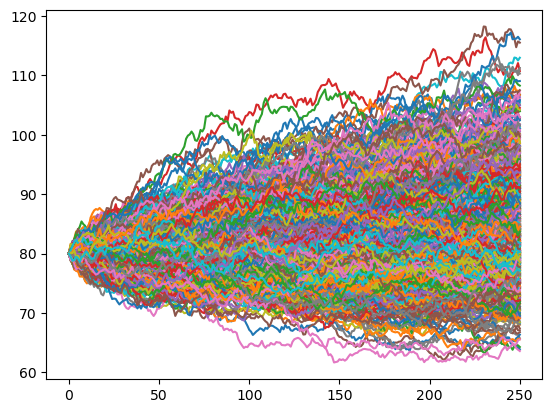

In [10]:
(X0*reality).T.plot(legend = False)

<AxesSubplot:>

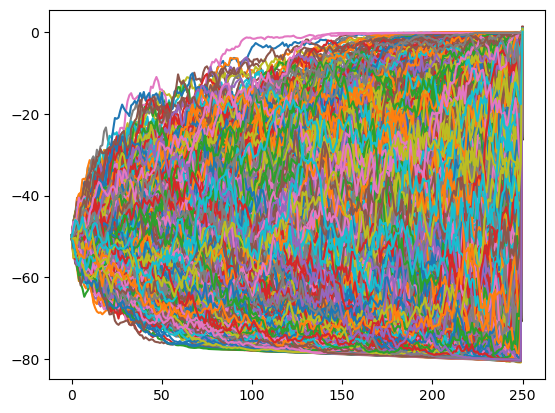

In [11]:
(money_time_call).T.plot(legend = False)

<AxesSubplot:>

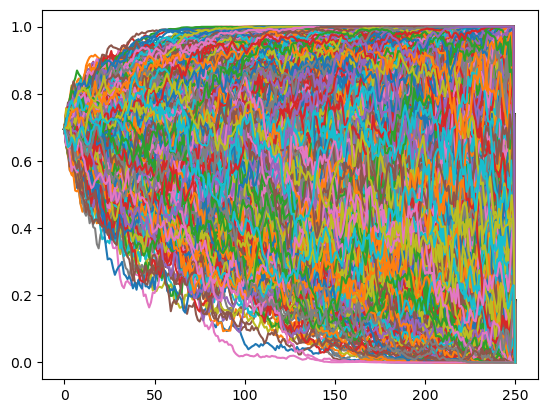

In [12]:
(delta_time_call).T.plot(legend = False)

(array([  1.,   3.,  12.,  36., 146., 291., 163.,  91.,  48.,  29.,  35.,
         25.,  23.,  20.,  20.,  24.,  17.,   8.,   7.,   1.]),
 array([-0.80937093, -0.70037984, -0.59138876, -0.48239767, -0.37340658,
        -0.2644155 , -0.15542441, -0.04643333,  0.06255776,  0.17154885,
         0.28053993,  0.38953102,  0.4985221 ,  0.60751319,  0.71650428,
         0.82549536,  0.93448645,  1.04347753,  1.15246862,  1.2614597 ,
         1.37045079]),
 <BarContainer object of 20 artists>)

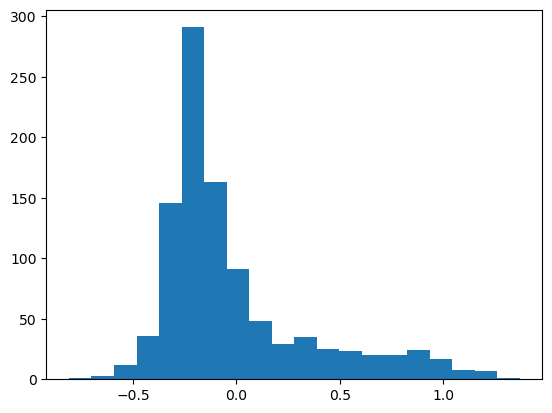

In [13]:
plt.hist(money_time_call.iloc[:,-1], bins = 20)

In [14]:
#put

In [15]:
mu = 0.06
sigma =  0.1
r = 0.05
T = 1
K = 80
X0 = 80
repeat = 1000

In [16]:
underlying = Underlying(mu, sigma, r, 250)

In [17]:
_, reality = underlying.simulate_P(repeat, T)

In [18]:
vanilla_put = Option(underlying, lambda X: payoff_put(X, K), T)

In [19]:
BC_price_put = vanilla_put.get_MC_price(X0, 0, method = 'var_control')
BC_price_put

1.572209732781463

In [20]:
money_time_put = pd.DataFrame(np.zeros(reality.shape))
delta_time_put = pd.DataFrame(np.zeros(reality.shape))
for i in tqdm(range(repeat)):
    trader = Trader(money = BC_price_put)
    money, delta = trader.full_hedge(vanilla_put, X0*reality.iloc[[i],:], update_freq = 1)
    money_time_put.loc[i] = money
    delta_time_put.loc[i] = delta

100%|███████████████████████████████████████| 1000/1000 [08:52<00:00,  1.88it/s]


<AxesSubplot:>

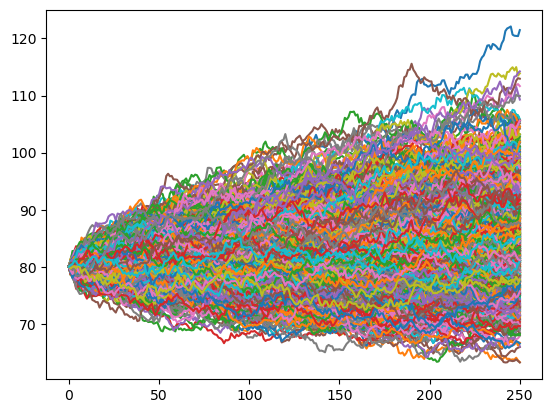

In [21]:
(X0*reality).T.plot(legend = False)

<AxesSubplot:>

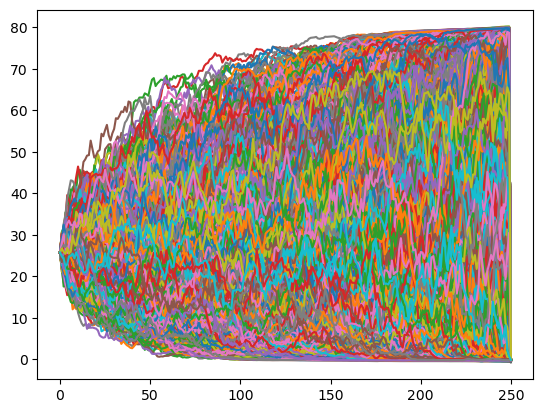

In [22]:
(money_time_put).T.plot(legend = False)

<AxesSubplot:>

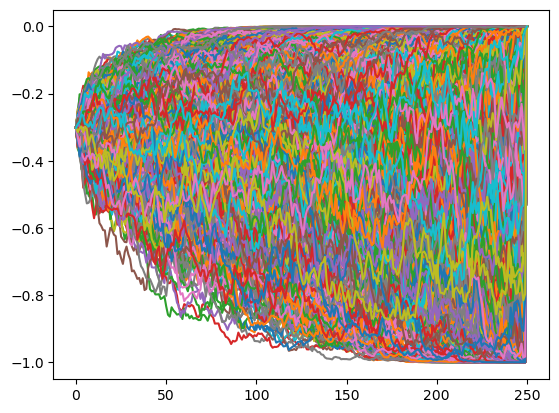

In [23]:
(delta_time_put).T.plot(legend = False)

(array([  1.,   2.,   7.,  30., 112., 279., 206.,  92.,  45.,  45.,  28.,
         31.,  29.,  29.,  19.,  14.,  10.,  16.,   2.,   3.]),
 array([-0.77470972, -0.66874027, -0.56277081, -0.45680135, -0.35083189,
        -0.24486243, -0.13889298, -0.03292352,  0.07304594,  0.1790154 ,
         0.28498486,  0.39095431,  0.49692377,  0.60289323,  0.70886269,
         0.81483215,  0.9208016 ,  1.02677106,  1.13274052,  1.23870998,
         1.34467944]),
 <BarContainer object of 20 artists>)

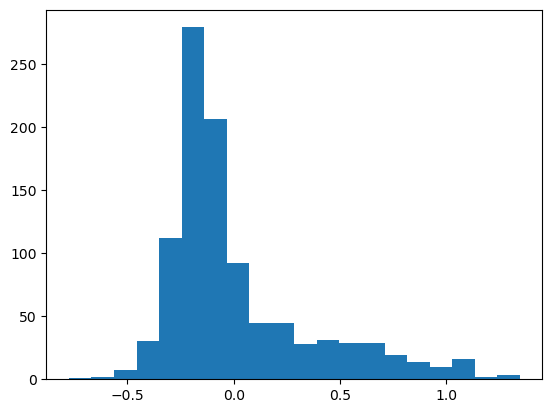

In [24]:
plt.hist(money_time_put.iloc[:,-1], bins = 20)